https://github.com/MaartenGr/feature-engineeringb

https://mp.weixin.qq.com/s?__biz=MzU0MDQ1NjAzNg==&mid=2247487411&idx=1&sn=c9a63f4d28971298f46bc00839ede222&chksm=fb39aab8cc4e23aeb73197ba159c2f8593efa613ed8da1816e6769b4d6d30cb53702dab47e71&mpshare=1&scene=2&srcid=&sharer_sharetime=1566951928704&sharer_shareid=958a9a0867a80e7cdee0402f297592b9&from=timeline#rd

In [1]:
# SMOTE
import pandas as pd
from imblearn.over_sampling import SMOTE

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [3]:
# 加载数据
df = pd.read_csv('../../dataset/creditcard_small.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1].map({1:'Fraud',0:'No Fraud'})

In [7]:
from collections import Counter

In [8]:
Counter(y)

Counter({'Fraud': 492, 'No Fraud': 5000})

In [9]:
# 重新采样数据
X_resampled,y_resampled = SMOTE(sampling_strategy={'Fraud':1000}).fit_resample(X,y)
X_resampled = pd.DataFrame(X_resampled,columns=X.columns)

In [13]:
# 创建新的特征
import featuretools as ft
import pandas as pd

# 创建实体
turnover_df = pd.read_csv('../../dataset/turnover.csv')
es = ft.EntitySet(id='Turnover')
es.entity_from_dataframe(entity_id='hr', dataframe=turnover_df, index='index')

# 指定trans_primitives参数以执行深度特征综合
feature_matrix, feature_defs = ft.dfs(entityset=es, target_entity='hr',
                                      trans_primitives=[
                                          'add_numeric', 'multiply_numeric'],
                                      verbose=True)

2019-08-28 15:54:11,675 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column
Built 668 features
Elapsed: 00:01 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [ ]:
# 缺失值处理
# 显示的导入enable_iterative_imputer后
# 再从sklearn.impute 导入IterativeImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 载入数据
titanic = pd.read_csv("../../dataset/titanic.csv")
titanic = titanic.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# 使用随机森林估计器
imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
titanic = pd.DataFrame(imp.fit_transform(titanic), columns=titanic.columns)

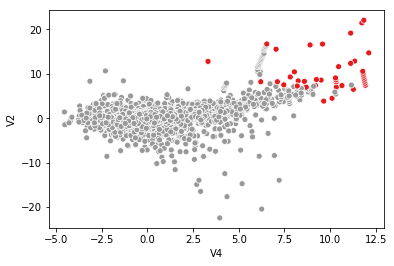

In [18]:
# 异常值检测
from sklearn.ensemble import IsolationForest
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt
# 预测和可视化离群点
credit_card = pd.read_csv('../../dataset/creditcard_small.csv').drop("Class", 1)
clf = IsolationForest(contamination=0.01, behaviour='new')
outliers = clf.fit_predict(credit_card)
sns.scatterplot(credit_card.V4, credit_card.V2, outliers, palette='Set1', legend=False)